## Prerequisites

First I will import the required libraries. I'm going to be using numpy for the matrix operations and matplotlib for creating graphs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First I'll define $f(x) = \frac{1}{1+25x^2}$ as a lambda function.

In [2]:
f = lambda x : (1 + 25*x**2)**-1

Now I will define lambda functions for the basis functions. Essentially they return the value for $x$ for at a particular $n$.

In [3]:
monomial_basis = lambda n, x : x**n
chebyshev_basis = lambda n, x : np.cos(n*np.arccos(x))

Next I will define lambda functoins for the x points we want to interpolate for.

In [4]:
uniform_pts = lambda n : np.linspace(-1, 1, n+1)
chebyshev_pts = lambda n : np.array([np.cos((-i/n)*np.pi) for i in range(n+1)])

Since $v_{ij}$ is just $T_J(x_i)$, where $T$ is the basis function, I'll define another lambda function for computing the Vandermonde matrix $V$.

In [5]:
vandermonde = lambda xpts, basis : np.array([[basis(j, xpts[i]) for j in range(len(xpts))] for i in range(len(xpts))])

Now I'll define a lambda function for evaluating the set of $x_i$ to get $y_i$ as well as the values of $n$ given in the problem.

In [6]:
f_ypts = lambda f, xpts : np.array([f(x) for x in xpts])
ns = [4, 8, 16, 32, 64, 128]

A wrapper function to get the coefficient matrix $a$ in $Va=b$

In [7]:
coef_solver = lambda V, b : np.linalg.solve(V, b)

Finally the interpolation function for $f$

In [8]:
def interpolation(coef, basis):
    n = len(coef)
    def _inp(x):
        s = 0
        for i in range(n):
            s += coef[i]*basis(i, x)
        return s
    return _inp

A function for approximating the $\infty$-norm over the domain between 2 functions by using $2000$ points.

In [9]:
def max_err(f1, f2):
    x = np.linspace(-1, 1, 2000)
    y1 = f_ypts(f1, x)
    y2 = f_ypts(f2, x)
    return np.max(np.abs(y1 - y2))

## Part I: Evenly spaced points and monomials as the basis.

In [10]:
errors = []
cond_n = []
for n in ns: 
    xpts = uniform_pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, monomial_basis)
    coef = coef_solver(V, ypts)
    
    ap = interpolation(coef, monomial_basis)
    
    errors.append(max_err(f, ap))
    cond_n.append(np.linalg.cond(V))

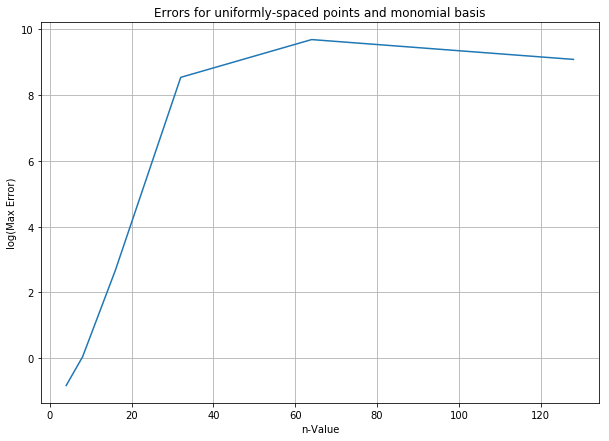

In [11]:
plt.figure(figsize=(10, 7))
plt.plot(ns, np.log(errors))
plt.title('Errors for uniformly-spaced points and monomial basis')
plt.xlabel('n-Value')
plt.ylabel('log(Max Error)')
plt.grid()
plt.show()

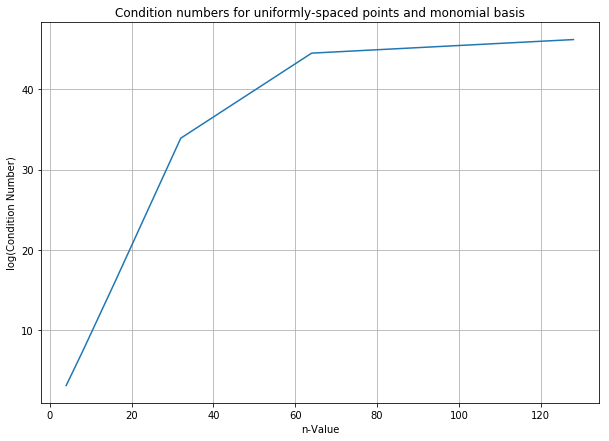

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(ns, np.log(cond_n))
plt.title('Condition numbers for uniformly-spaced points and monomial basis')
plt.xlabel('n-Value')
plt.ylabel('log(Condition Number)')
plt.grid()
plt.show()

## Part II: Evenly spaced points and Chebyshev polynomials as the basis.

In [13]:
errors = []
cond_n = []
for n in ns: 
    xpts = uniform_pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, chebyshev_basis)
    coef = coef_solver(V, ypts)
    
    ap = interpolation(coef, chebyshev_basis)
    
    errors.append(max_err(f, ap))
    cond_n.append(np.linalg.cond(V))

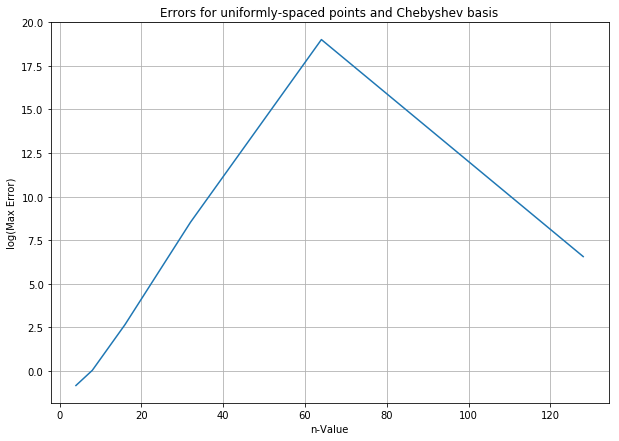

In [14]:
plt.figure(figsize=(10, 7))
plt.plot(ns, np.log(errors))
plt.title('Errors for uniformly-spaced points and Chebyshev basis')
plt.xlabel('n-Value')
plt.ylabel('log(Max Error)')
plt.grid()
plt.show()

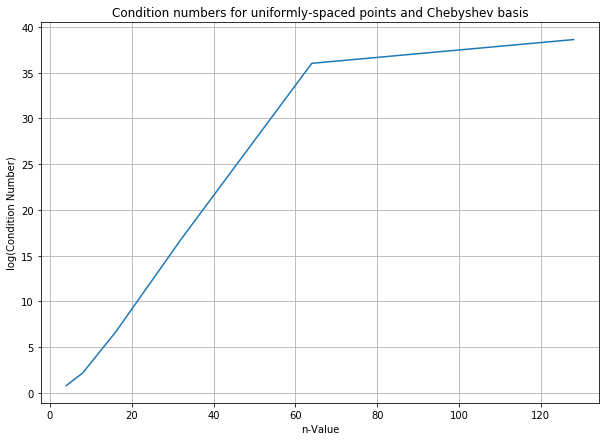

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(ns, np.log(cond_n))
plt.title('Condition numbers for uniformly-spaced points and Chebyshev basis')
plt.xlabel('n-Value')
plt.ylabel('log(Condition Number)')
plt.grid()
plt.show()

## Part III: Chebyshev points and monomials as the basis.

In [16]:
errors = []
cond_n = []
for n in ns: 
    xpts = chebyshev_pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, monomial_basis)
    coef = coef_solver(V, ypts)
    
    ap = interpolation(coef, monomial_basis)
    
    errors.append(max_err(f, ap))
    cond_n.append(np.linalg.cond(V))

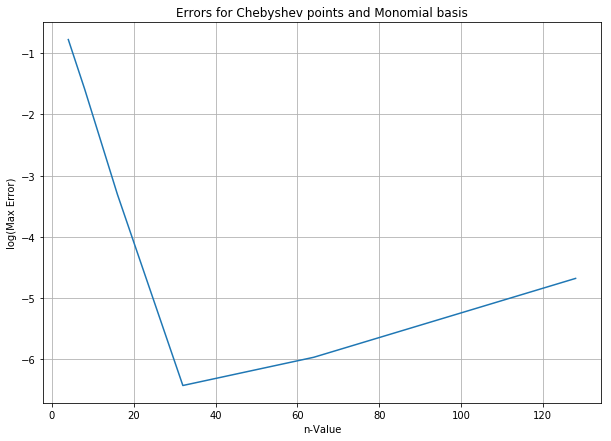

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(ns, np.log(errors))
plt.title('Errors for Chebyshev points and Monomial basis')
plt.xlabel('n-Value')
plt.ylabel('log(Max Error)')
plt.grid()
plt.show()

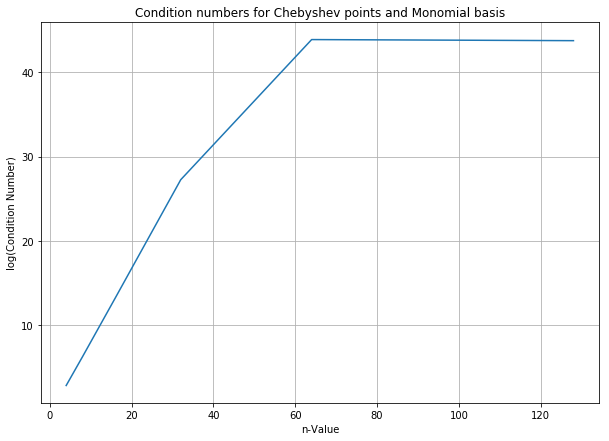

In [18]:
plt.figure(figsize=(10, 7))
plt.plot(ns, np.log(cond_n))
plt.title('Condition numbers for Chebyshev points and Monomial basis')
plt.xlabel('n-Value')
plt.ylabel('log(Condition Number)')
plt.grid()
plt.show()

## Part IV: Chebyshev points and Chebyshev polynomials as the basis.

In [19]:
errors = []
cond_n = []
for n in ns: 
    xpts = chebyshev_pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, chebyshev_basis)
    coef = coef_solver(V, ypts)
    
    ap = interpolation(coef, chebyshev_basis)
    
    errors.append(max_err(f, ap))
    cond_n.append(np.linalg.cond(V))

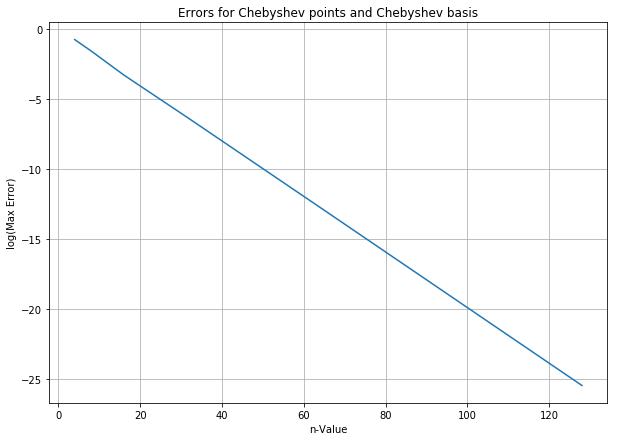

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(ns, np.log(errors))
plt.title('Errors for Chebyshev points and Chebyshev basis')
plt.xlabel('n-Value')
plt.ylabel('log(Max Error)')
plt.grid()
plt.show()

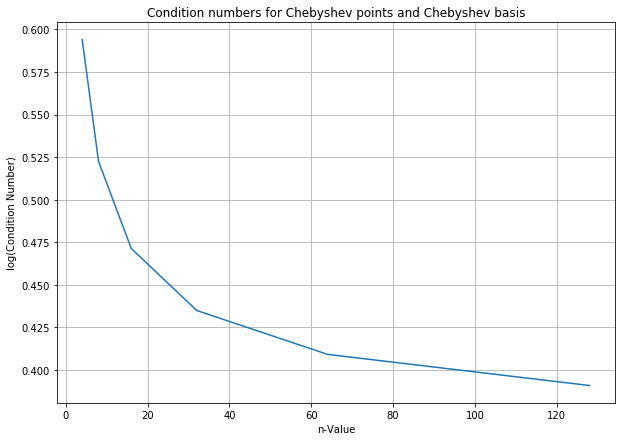

In [21]:
plt.figure(figsize=(10, 7))
plt.plot(ns, np.log(cond_n))
plt.title('Condition numbers for Chebyshev points and Chebyshev basis')
plt.xlabel('n-Value')
plt.ylabel('log(Condition Number)')
plt.grid()
plt.show()

## Conclusion

We can clearly see the effects of the Runge phenomenon when we look at the differences in the max error graphs for the uniformly chosen points and the Chebyshev points. Another interesting point is that the error is monotonically decreasing for larger values of $n$ in the Chebyshev basis, but the monomial basis is more volatile in terms of how the error changes with respect to the value of $n$. It just goes to show that using a Chebyshev basis with Chebyshev points produces a smaller maximum error for the function $f(x) = \frac{1}{1+25x^2}$ on the domain $[-1, 1]$ than using uniformly chosen points with a monomial basis.

# Bonus

I just want to see what the interpolations look like.

### n = 4

In [22]:
interpolations = [(f, 'Original')]
n = 4
for (pts, bas), name in zip(
                zip([uniform_pts,    uniform_pts,     chebyshev_pts,  chebyshev_pts],
                    [monomial_basis, chebyshev_basis, monomial_basis, chebyshev_basis]),
                    ['uniform, monomial', 'uniform, chebyshev', 'chebyshev, monomial', 'chebyshev, chebyshev']): 
    xpts = pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, bas)
    coef = coef_solver(V, ypts)
    
    apx = interpolation(coef, bas)
    
    interpolations.append((apx, name))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


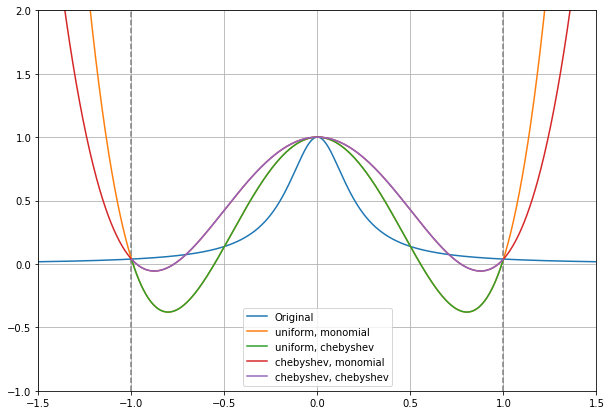

In [23]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.axvline(x=-1, linestyle='--', color='gray')
plt.axvline(x=1, linestyle='--', color='gray')
for apx, name in interpolations:
    x = np.linspace(-1.5, 1.5, 1000)
    y = f_ypts(apx, x)
    plt.plot(x, y, label=name)
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 2)
plt.show()

### n = 8

In [24]:
interpolations = [(f, 'Original')]
n = 8
for (pts, bas), name in zip(
                zip([uniform_pts,    uniform_pts,     chebyshev_pts,  chebyshev_pts],
                    [monomial_basis, chebyshev_basis, monomial_basis, chebyshev_basis]),
                    ['uniform, monomial', 'uniform, chebyshev', 'chebyshev, monomial', 'chebyshev, chebyshev']): 
    xpts = pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, bas)
    coef = coef_solver(V, ypts)
    
    apx = interpolation(coef, bas)
    
    interpolations.append((apx, name))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


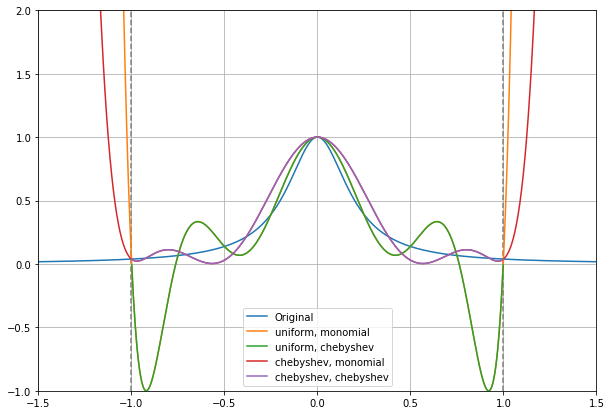

In [25]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.axvline(x=-1, linestyle='--', color='gray')
plt.axvline(x=1, linestyle='--', color='gray')
for apx, name in interpolations:
    x = np.linspace(-1.5, 1.5, 1000)
    y = f_ypts(apx, x)
    plt.plot(x, y, label=name)
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 2)
plt.show()

### n = 16

In [26]:
interpolations = [(f, 'Original')]
n = 16
for (pts, bas), name in zip(
                zip([uniform_pts,    uniform_pts,     chebyshev_pts,  chebyshev_pts],
                    [monomial_basis, chebyshev_basis, monomial_basis, chebyshev_basis]),
                    ['uniform, monomial', 'uniform, chebyshev', 'chebyshev, monomial', 'chebyshev, chebyshev']): 
    xpts = pts(n)
    ypts = f_ypts(f, xpts)
    
    V = vandermonde(xpts, bas)
    coef = coef_solver(V, ypts)
    
    apx = interpolation(coef, bas)
    
    interpolations.append((apx, name))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arccos
  


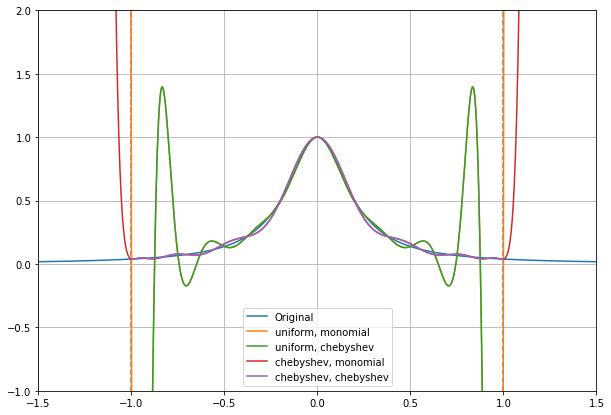

In [27]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.axvline(x=-1, linestyle='--', color='gray')
plt.axvline(x=1, linestyle='--', color='gray')
for apx, name in interpolations:
    x = np.linspace(-1.5, 1.5, 1000)
    y = f_ypts(apx, x)
    plt.plot(x, y, label=name)
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 2)
plt.show()